<a href="https://colab.research.google.com/github/AjinkyaDS/AjinkyaDS/blob/main/ACERDAIN_ASSINGMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proactive  fraud detection

## Importing required Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Scource
### Given in pdf

## 1. Importing Dataset

In [5]:
# import dataset
df = pd.read_csv(r"/Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1199818,133,CASH_OUT,289179.29,C1161844921,69094.21,0.00,C1605155938,1365313.98,1654493.27,0.0,0.0
1199819,133,CASH_OUT,108475.74,C1719955228,0.00,0.00,C2020281248,342154.21,305258.09,0.0,0.0
1199820,133,CASH_OUT,237321.45,C768119767,0.00,0.00,C1037845721,958985.31,1196306.75,0.0,0.0
1199821,133,CASH_OUT,88082.26,C1233634548,0.00,0.00,C479385353,1264431.28,1352513.54,0.0,0.0


In [6]:
df.shape
print(f"Shape of dataset is {df.shape}")

Shape of dataset is (1199823, 11)


### 3. Data Checks to perform

- Check Missing values
- Check data type
- Check the number of unique values of each column
- Check the statistics of data dataset
- Check various categories present in the different categorical columns

## 1: Data Cleaning (Handling Missing Values, Outliers and  Multi-Collinearity)

In [7]:
# checkomg for null  value
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1199818,False,False,False,False,False,False,False,False,False,False,False
1199819,False,False,False,False,False,False,False,False,False,False,False
1199820,False,False,False,False,False,False,False,False,False,False,False
1199821,False,False,False,False,False,False,False,False,False,False,False


In [8]:
null_values = df.isnull().sum()
print("null_values:\n", null_values)

null_values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


## INSIGHT :
### we can no null  values present

In [9]:
# Now checking for duplicates  values:

dupicates_row = df.duplicated().sum()
print(f"\n Duplicate row: ",dupicates_row)


 Duplicate row:  0


In [10]:
# now statistical summary
statistics = df.describe()
statistics

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.199823e+06,1.199823e+06,1.199822e+06,1.199822e+06,1.199822e+06,1.199822e+06,1.199822e+06,1199822.0
mean,3.962644e+01,1.619146e+05,8.743399e+05,8.944795e+05,9.817658e+05,1.115590e+06,1.265188e-03,0.0
std,3.654579e+01,2.744493e+05,2.968431e+06,3.004833e+06,2.302153e+06,2.417810e+06,3.554698e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.244014e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,3.300000e+01,7.711378e+04,1.572500e+04,0.000000e+00,1.261629e+05,2.188959e+05,0.000000e+00,0.0
75%,4.200000e+01,2.166025e+05,1.322047e+05,1.716010e+05,9.222004e+05,1.152350e+06,0.000000e+00,0.0
max,1.330000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.216916e+07,4.220740e+07,1.000000e+00,0.0


In [13]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.199823e+06,1.199823e+06,1.199822e+06,1.199822e+06,1.199822e+06,1.199822e+06,1.199822e+06,1199822.0
mean,3.962644e+01,1.619146e+05,8.743399e+05,8.944795e+05,9.817658e+05,1.115590e+06,1.265188e-03,0.0
std,3.654579e+01,2.744493e+05,2.968431e+06,3.004833e+06,2.302153e+06,2.417810e+06,3.554698e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.244014e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,3.300000e+01,7.711378e+04,1.572500e+04,0.000000e+00,1.261629e+05,2.188959e+05,0.000000e+00,0.0
75%,4.200000e+01,2.166025e+05,1.322047e+05,1.716010e+05,9.222004e+05,1.152350e+06,0.000000e+00,0.0
max,1.330000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.216916e+07,4.220740e+07,1.000000e+00,0.0


### Insight
"""
The dataset reveals a wide range of transaction amounts, with a mean of 1.79 million and a median of 74.87K.
The mean balance before transactions is significantly lower than the maximum values, suggesting most accounts have smaller balances.
New balance distribution is slightly higher than senders, indicating fraud attempts. Only 0.129% of transactions are fraudulent, suggesting the need for fraud detection models like oversampling or cost-sensitive learning.
Flagged fraud transactions are minimal, suggesting improvements in detection thresholds
"""

In [14]:
df.nunique()

,0
step,133
type,5
amount,1150272
nameOrig,1199486
oldbalanceOrg,462326
newbalanceOrig,530299
nameDest,515594
oldbalanceDest,689345
newbalanceDest,528638
isFraud,2


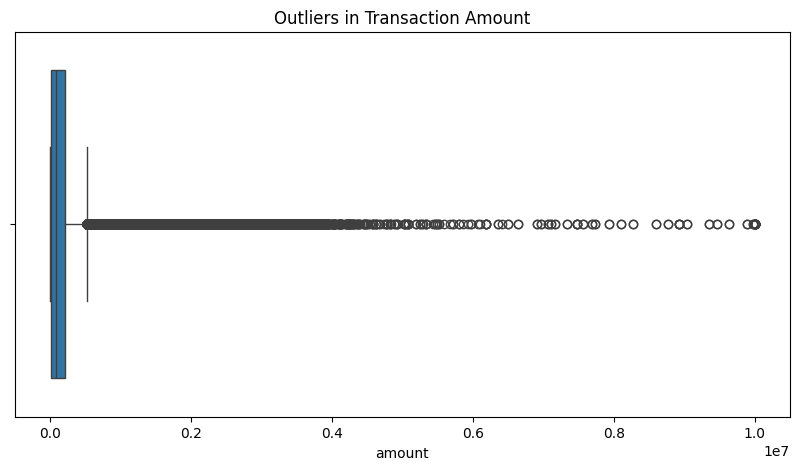

In [15]:
# Visualizing outliers in transaction amount
plt.figure(figsize=(10,5))
sns.boxplot(x=df["amount"])
plt.title("Outliers in Transaction Amount")
plt.show()

### INsight
"""
Outliers in transactions, particularly those with extreme values, indicate potential fraudulent activity.
The right-skewed distribution suggests small transactions, with some reaching up to 90 million.
Further investigation of outlier transactions and filtering based on IQR or domain knowledge may improve fraud detection
"""

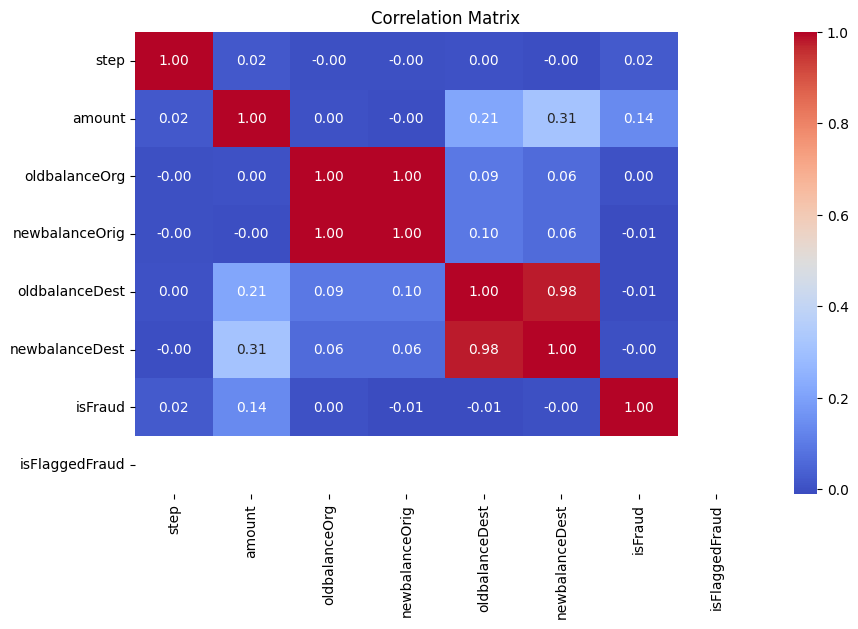

In [16]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 2: Fraud Detection Model

### Random Forest For Fraud detection

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Dropping non-numeric columns
df = df.drop(["nameOrig", "nameDest"], axis=1)

# Encoding categorical feature 'type' into numeric
df = pd.get_dummies(df, columns=["type"], drop_first=True)

# Splitting into features and target
X = df.drop(["isFraud", "isFlaggedFraud"], axis=1)
y = df["isFraud"]

# Splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


ValueError: Input y contains NaN.

In [18]:
df["isFraud"]

,isFraud
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
1199818,0.0
1199819,0.0
1199820,0.0
1199821,0.0


In [20]:
nan_check = df["isFraud"].isna()
print(nan_check)


0          False
1          False
2          False
3          False
4          False
           ...  
1199818    False
1199819    False
1199820    False
1199821    False
1199822     True
Name: isFraud, Length: 1199823, dtype: bool
